# Benchmark: Árvore de Decisão

Neste notebook vamos aplicar um modelo de Árvore de Decisão.
A vantagem deste modelo é a sua interpretabilidade visual, permitindo ver as regras que ele cria.

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar Dataset
df = pd.read_csv('../Datasets/dataset_final_merged_v2.csv', low_memory=False)

# Converter Data
df['Data'] = pd.to_datetime(df['Data'])
df = df.sort_values('Data')

# Criar Target
mapping_resultado = {'H': 0, 'D': 1, 'A': 2}
df['Target'] = df['Resultado_Final'].map(mapping_resultado)
df = df.dropna(subset=['Target'])

In [4]:
# Seleção de Features (Mesmas do XGBoost)
features = [
#     'Odd_Casa_Bet365', 'Odd_Empate_Bet365', 'Odd_Visitante_Bet365',
    'Home_hist_Pontos', 'Home_hist_GolosMarcados', 'Home_hist_GolosSofridos', 
    'Home_hist_xG', 'Home_hist_xGA', 'Home_hist_PosseDeBola',
    'Away_hist_Pontos', 'Away_hist_GolosMarcados', 'Away_hist_GolosSofridos',
    'Away_hist_xG', 'Away_hist_xGA', 'Away_hist_PosseDeBola',
    # Stats Forma (5 jogos)
    'Casa_Form_Pts5', 'Casa_Form_GM5', 'Casa_Form_GS5',
    'Visitante_Form_Pts5', 'Visitante_Form_GM5', 'Visitante_Form_GS5',
    'Casa_Form_Empates5', 'Visitante_Form_Empates5',
    'Home_hist_GolosEsperados', 'Home_hist_GolosEsperadosSofridos',
    'Away_hist_GolosEsperados', 'Away_hist_GolosEsperadosSofridos',
    'Home_hist_PassesProgressivos', 'Away_hist_PassesProgressivos',
    'Home_hist_JogosSemSofrerGolos', 'Away_hist_JogosSemSofrerGolos'
]

features_existentes = [c for c in features if c in df.columns]
X = df[features_existentes]
y = df['Target']

In [5]:
# Divisão Treino / Teste (Temporal)
split_date = '2023-08-01'
mask_train = df['Data'] < split_date
mask_test = df['Data'] >= split_date

X_train = X[mask_train]
y_train = y[mask_train]
X_test = X[mask_test]
y_test = y[mask_test]

print(f"Treino: {len(X_train)} jogos")
print(f"Teste: {len(X_test)} jogos")

Treino: 3714 jogos
Teste: 711 jogos


In [6]:
# Treinar Árvore de Decisão
# max_depth limitado para evitar overfitting e manter a árvore legível
model = DecisionTreeClassifier(max_depth=4, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",4
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

Accuracy (DecisionTree): 0.48

Classification Report:
              precision    recall  f1-score   support

        Casa       0.66      0.46      0.54       300
      Empate       0.30      0.61      0.41       180
   Visitante       0.68      0.42      0.52       231

    accuracy                           0.48       711
   macro avg       0.55      0.50      0.49       711
weighted avg       0.58      0.48      0.50       711



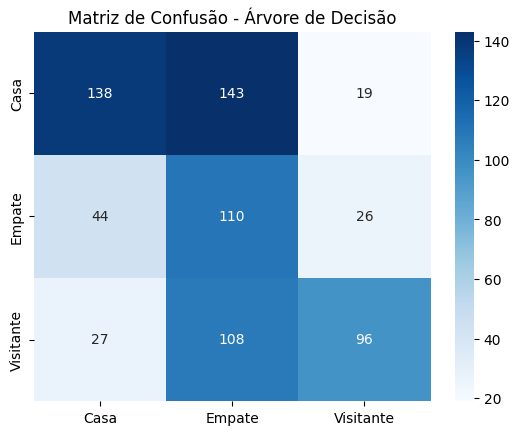

In [7]:
# Avaliação
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy (DecisionTree): {acc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Casa', 'Empate', 'Visitante']))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Casa', 'Empate', 'Visitante'], yticklabels=['Casa', 'Empate', 'Visitante'])
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()

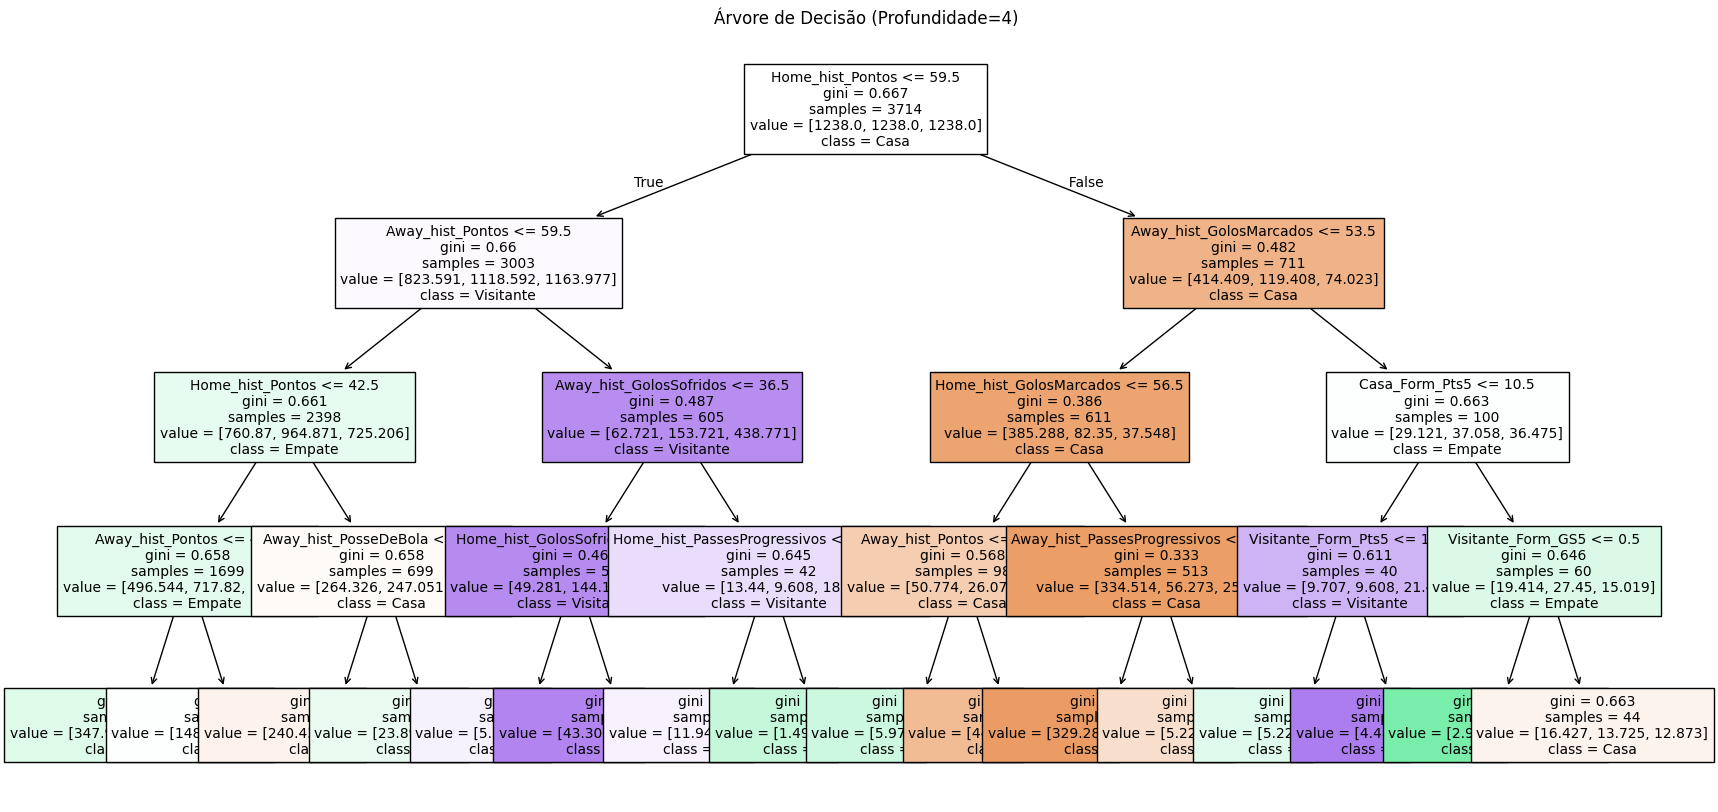

In [8]:
# Visualizar a Árvore (primeiros níveis)
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=features_existentes, class_names=['Casa', 'Empate', 'Visitante'], filled=True, fontsize=10)
plt.title("Árvore de Decisão (Profundidade=4)")
plt.show()